In [1]:
%env OMP_NUM_THREADS=1
%env NUMEXPR_MAX_THREADS=1

import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)
import xarray as xr

from mydedalustools import *    
  

env: OMP_NUM_THREADS=1
env: NUMEXPR_MAX_THREADS=1


In [6]:
meter = 1 / 6.37122e6
hour = 1
second = hour / 3600
day = hour*24

# 10 day radiative time scale with VMT

In [27]:
%time sol_2l_earthlike_10day_vmt  = open_h5s('snapshots_2l_earthlike_10days_vmt',('s1','s2'))

CPU times: user 1.9 s, sys: 6.89 s, total: 8.8 s
Wall time: 8.8 s


In [28]:
taurad = 10*day
Omega = 2*np.pi/86400 / second 
R = 6400e3 * meter
g = 10*meter/second**2
deltarho_ov_rho1 = 0.1
gprime = g * deltarho_ov_rho1

rho1_ov_rho2 = 1#/(1+deltarho_ov_rho1)
H0 = 1e4*meter
DeltaHeq = 2.4*H0


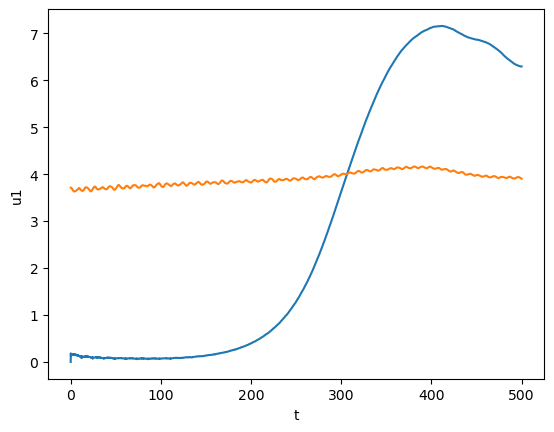

In [29]:
(uprimerms(sol_2l_earthlike_10day_vmt.u1[:,0])/(meter/second)).mean('latitude').plot()
(sol_2l_earthlike_10day_vmt.u1[:,0].mean(('longitude','latitude'))/(meter/second)).plot()

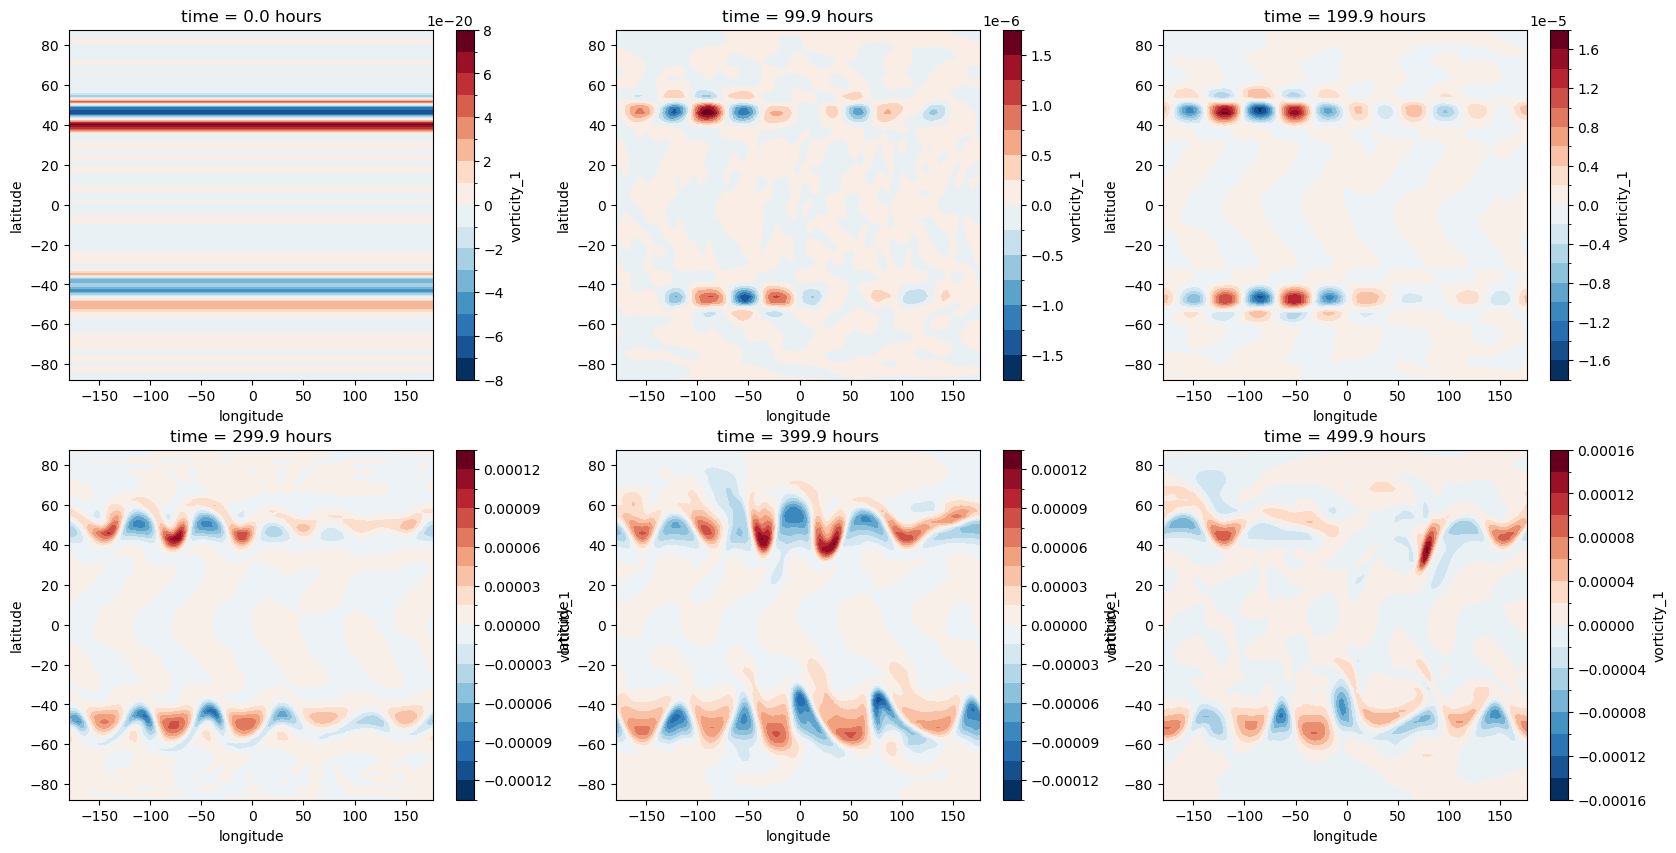

In [30]:
sol=sol_2l_earthlike_10day_vmt
_,axs=plt.subplots(2,3,figsize=(20,10))
axs=axs.reshape(-1)
for i,time in enumerate(np.linspace(0,len(sol.t)-1,6)):
    time=int(time)
    ((sol.vorticity_1[time]-sol.vorticity_1[time].mean('longitude'))*second).plot.contourf(ax=axs[i],levels=18,y='latitude')
    #axs[i].set_xlim(-90,90)
    axs[i].set_title("time = %.1f hours"%sol.t[time])
    

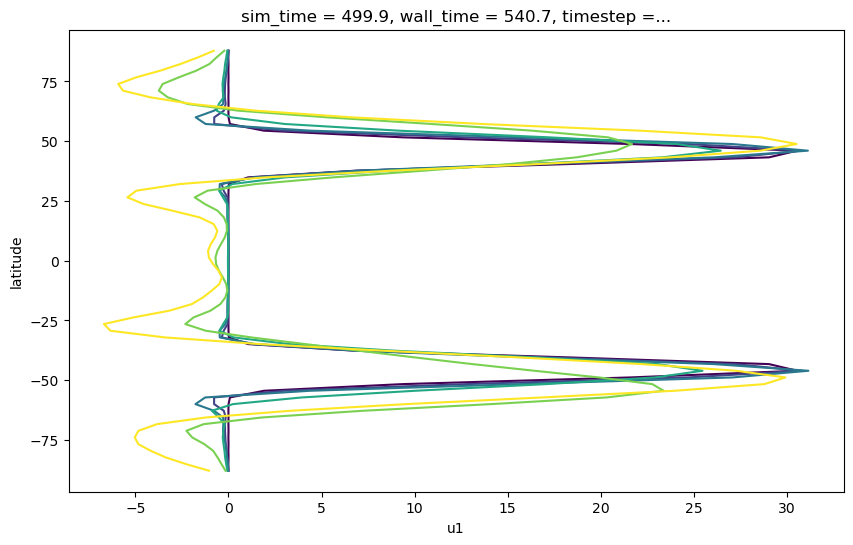

In [31]:
sol=sol_2l_earthlike_10day_vmt
_,ax=plt.subplots(1,1,figsize=(10,6))
colors1 = plt.cm.viridis(np.linspace(0,1,6))
colors2 = plt.cm.plasma(np.linspace(0,1,6))
for i,time in enumerate(np.linspace(0,len(sol.t)-1,6)):
    time=int(time)
    (sol.u1[time,0]/(meter/second)).mean('longitude').plot(ax=ax,y='latitude',color = colors1[i])
    #(sol.u2[time,0]/(meter/second)).mean('longitude').plot(ax=ax,y='latitude',color = colors2[i])
    #axs[i].set_xlim(-90,90)
    #axs[i].set_title("time = %.1f hours"%sol.t[time])
    

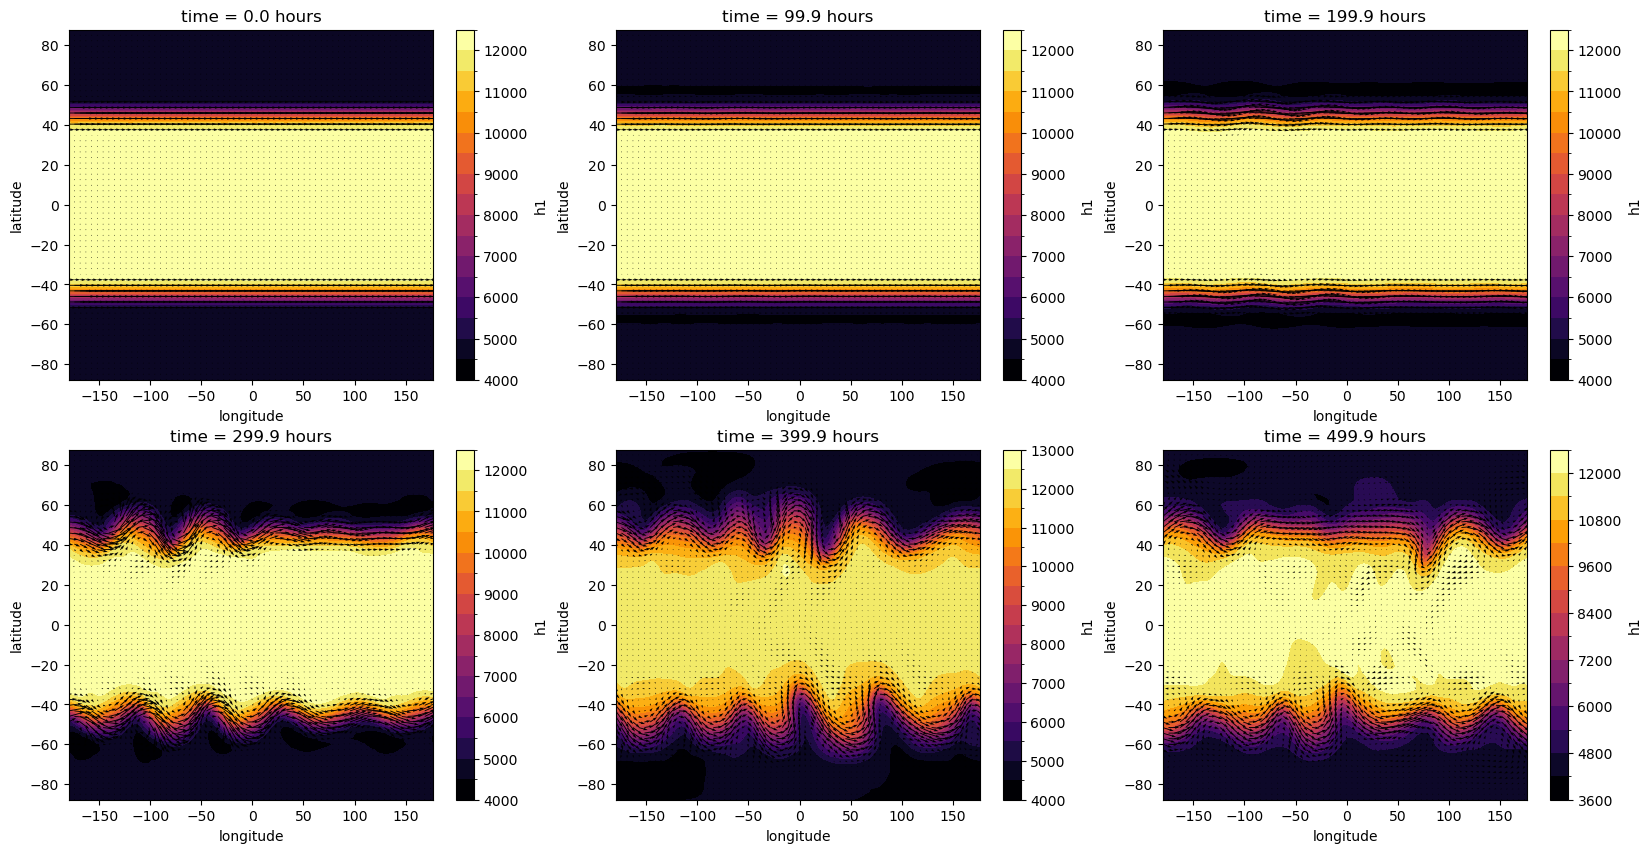

In [32]:
sol=sol_2l_earthlike_10day_vmt
_,axs=plt.subplots(2,3,figsize=(20,10))
axs=axs.reshape(-1)
for i,time in enumerate(np.linspace(0,len(sol.t)-1,6)):
    time=int(time)
    ((sol.h1[time])/meter).plot.contourf(ax=axs[i],y='latitude',levels=18,cmap=plt.cm.inferno)
    n=2;m=1
    axs[i].quiver(sol.longitude[::n],
                  sol.latitude[::m] ,
                  sol.u1[time,0][::n,::m].T,
                  -sol.u1[time,1][::n,::m].T)
    #axs[i].set_xlim(-90,90)
    axs[i].set_title("time = %.1f hours"%sol.t[time])
    

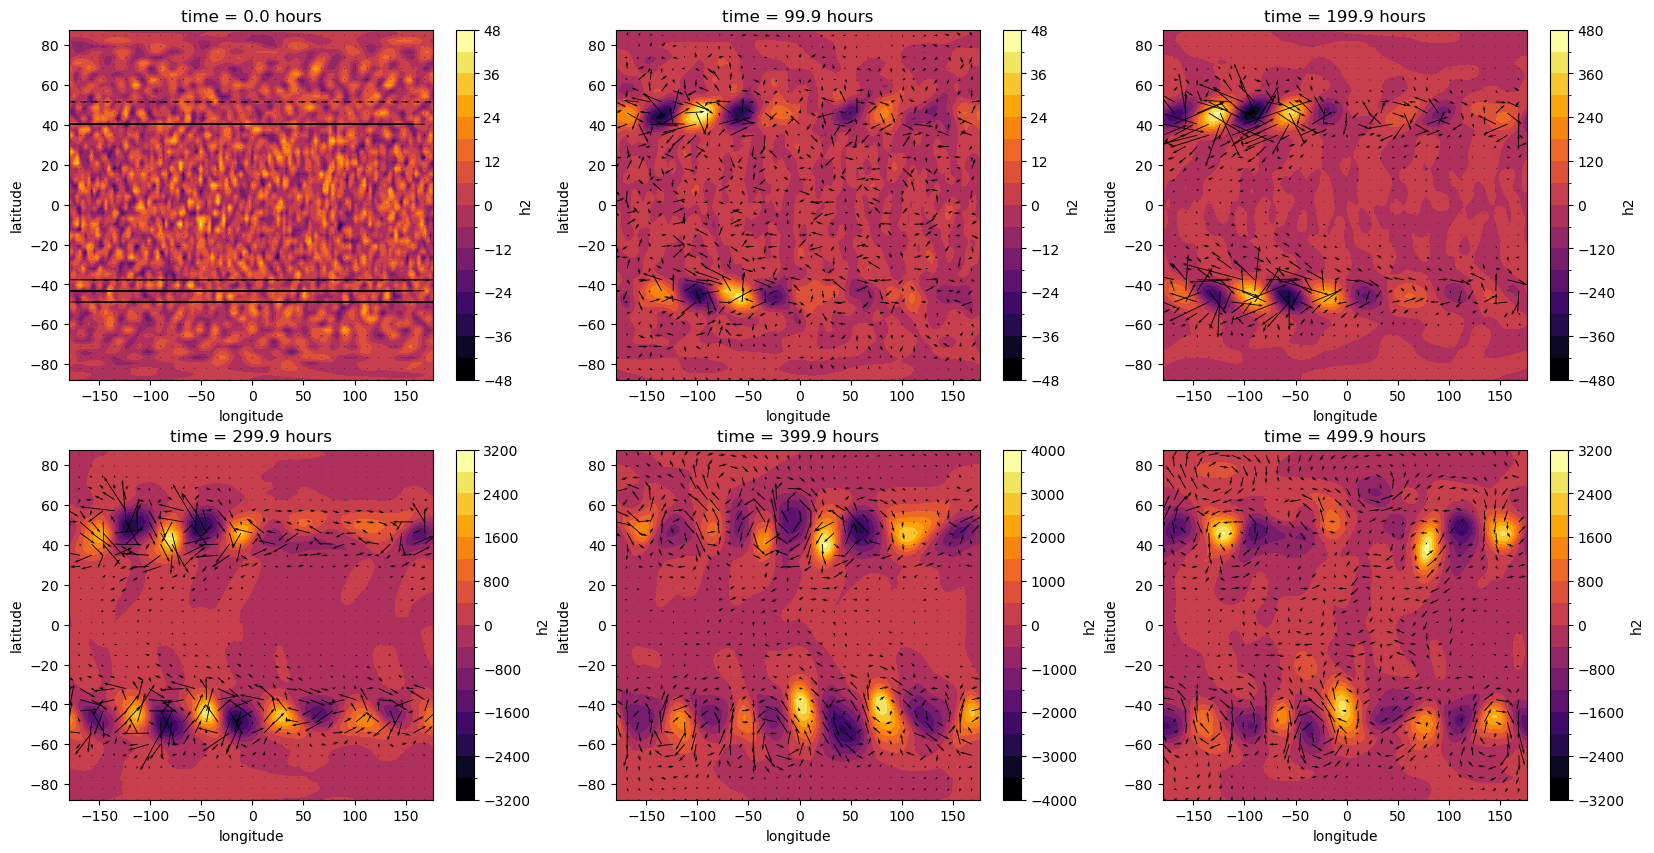

In [33]:
sol=sol_2l_earthlike_10day_vmt
_,axs=plt.subplots(2,3,figsize=(20,10))
axs=axs.reshape(-1)
for i,time in enumerate(np.linspace(0,len(sol.t)-1,6)):
    time=int(time)
    ((sol.h2[time]-sol.h2[time].mean('longitude'))/meter).plot.contourf(ax=axs[i],y='latitude',levels=18,cmap=plt.cm.inferno)
    n=4;m=2
    axs[i].quiver(sol.longitude[::n],
                  sol.latitude[::m] ,
                  (sol.u2[time,0]-sol.u2[time,0].mean('longitude'))[::n,::m].T,
                  -(sol.u2[time,1]-sol.u2[time,1].mean('longitude'))[::n,::m].T)
    #axs[i].set_xlim(-90,90)
    axs[i].set_title("time = %.1f hours"%sol.t[time])
    

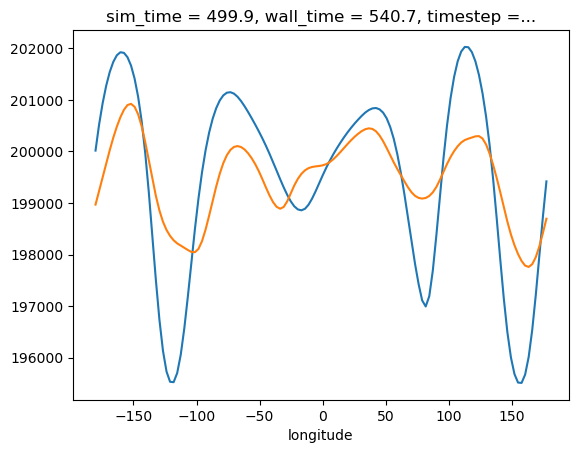

In [34]:
h1 = sol.h1[-1].sel(latitude=45,method='nearest')/meter
h2 = sol.h2[-1].sel(latitude=45,method='nearest')/meter

(10*(h1+h2)).plot()
(10*(h1+h2)+h2-h2.mean()).plot()

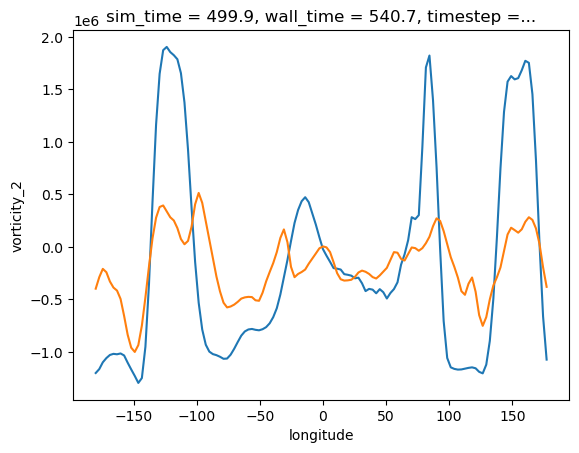

In [35]:
v1 = sol.vorticity_1[-1].sel(latitude=45,method='nearest')/meter
v2 = sol.vorticity_2[-1].sel(latitude=45,method='nearest')/meter

v1.plot()
v2.plot()